In [5]:
!pip install opencv-python


  Using cached opencv_python-4.11.0.86-cp37-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (20 kB)
Using cached opencv_python-4.11.0.86-cp37-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (63.0 MB)


In [ ]:
!pip install requests 

  Using cached requests-2.32.3-py3-none-any.whl.metadata (4.6 kB)
  Using cached charset_normalizer-3.4.1-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (35 kB)
  Using cached idna-3.10-py3-none-any.whl.metadata (10 kB)
  Using cached urllib3-2.4.0-py3-none-any.whl.metadata (6.5 kB)
Using cached requests-2.32.3-py3-none-any.whl (64 kB)
Using cached charset_normalizer-3.4.1-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (145 kB)
Using cached idna-3.10-py3-none-any.whl (70 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5/5 [requests]2/5 [charset-normalizer]


In [3]:
!pip install matplotlib


  Using cached matplotlib-3.10.1-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached kiwisolver-1.4.8-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.2 kB)
  Using cached numpy-2.2.5-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
Using cached matplotlib-3.10.1-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (8.6 MB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 22.0 MB/s eta 0:00:00a 0:00:01
Using cached kiwisolver-1.4.8-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.5 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 9.8 MB/s eta 0:00:00ta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 15.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8/8 [matplotlib]8 [matplotlib]


In [6]:
import zipfile
import requests
import cv2
import matplotlib.pyplot as plt
import glob 
import random
import os

In [7]:
!pip install ultralytics  # Зеркало Tsinghua

  Using cached PyYAML-6.0.2-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (2.1 kB)
  Using cached scipy-1.15.2-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
  Using cached py_cpuinfo-9.0.0-py3-none-any.whl.metadata (794 bytes)
  Using cached pandas-2.2.3-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (89 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached ultralytics_thop-2.0.14-py3-none-any.whl.metadata (9.4 kB)
  Using cached networkx-3.4.2-py3-none-any.whl.metadata (6.3 kB)
  Using cached jinja2-3.1.6-py3-none-any.whl.metadata (2.9 kB)
  Using cached mpmath-1.3.0-py3-none-any.whl.metadata (8.6 kB)
  Using cached MarkupSafe-3.0.2-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.0 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 7.2 MB/s eta 0:00:00a 0:00:01
Using cached pandas-2.2.3-cp312-

In [16]:
os.makedirs('datasets', exist_ok=True)

In [9]:
%cd ./dataset/

/home/alex/Документы/vs_code/ml/vr1/dataset


In [10]:
%%writefile pothole_v8.yaml
path: /home/alex/Документы/vs_code/ml/vr1/dataset  # абсолютный путь к датасету
train: train/images
val: valid/images
test: test/images

nc: 6
names: ['corrosion', 'crack', 'delamination', 'dirty- mold', 'paint defect', 'rust']

Writing pothole_v8.yaml


In [17]:
!yolo detect train \
data=pothole_v8.yaml \
model=yolov8n.pt \
epochs=100 \
imgsz=640 \
batch=8 \
project=runs/train \
name=yolov8n_defects_final \
cache=True \
pretrained=False  # Важно!

Ultralytics 8.3.121 🚀 Python-3.12.9 torch-2.7.0+cu126 CUDA:0 (NVIDIA GeForce RTX 3060, 11918MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=pothole_v8.yaml, epochs=100, time=None, patience=100, batch=8, imgsz=640, save=True, save_period=-1, cache=True, device=None, workers=8, project=runs/train, name=yolov8n_defects_final, exist_ok=False, pretrained=False, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, sho

In [22]:
!yolo detect predict \
model=runs/train/yolov8n_defects_final/weights/best.pt \
source=valid/images \
imgsz=1280 \
conf=0.25 \
half=True \
device=0 \
show_labels=True \
save_txt=True

Ultralytics 8.3.121 🚀 Python-3.12.9 torch-2.7.0+cu126 CUDA:0 (NVIDIA GeForce RTX 3060, 11918MiB)
Model summary (fused): 72 layers, 3,006,818 parameters, 0 gradients, 8.1 GFLOPs

image 1/169 /home/alex/Документы/vs_code/ml/vr1/dataset/valid/images/0f520d6b-5d8a-49e4-89f8-8fc82279a64d_jpeg.rf.023b48bc293ab234b811389ffd9c748d.jpg: 1280x832 3 cracks, 74.4ms
image 2/169 /home/alex/Документы/vs_code/ml/vr1/dataset/valid/images/1031_jpg.rf.b3f878edc9c86b3451a1d8eda90e8f7a.jpg: 1280x1280 1 crack, 1 paint defect, 7.0ms
image 3/169 /home/alex/Документы/vs_code/ml/vr1/dataset/valid/images/1046_jpeg.rf.3a945652a7186f0247a702786942bd8a.jpg: 1280x960 1 crack, 1 paint defect, 77.6ms
image 4/169 /home/alex/Документы/vs_code/ml/vr1/dataset/valid/images/1066_jpg.rf.59d91f11c59f1573af91fa2b7f447606.jpg: 992x1280 1 crack, 2 delaminations, 1 dirty- mold, 73.8ms
image 5/169 /home/alex/Документы/vs_code/ml/vr1/dataset/valid/images/10_jpeg.rf.afa8d5fba630f0dc83c2fb7b0d4a1f1d.jpg: 928x1280 1 crack, 2 delaminat

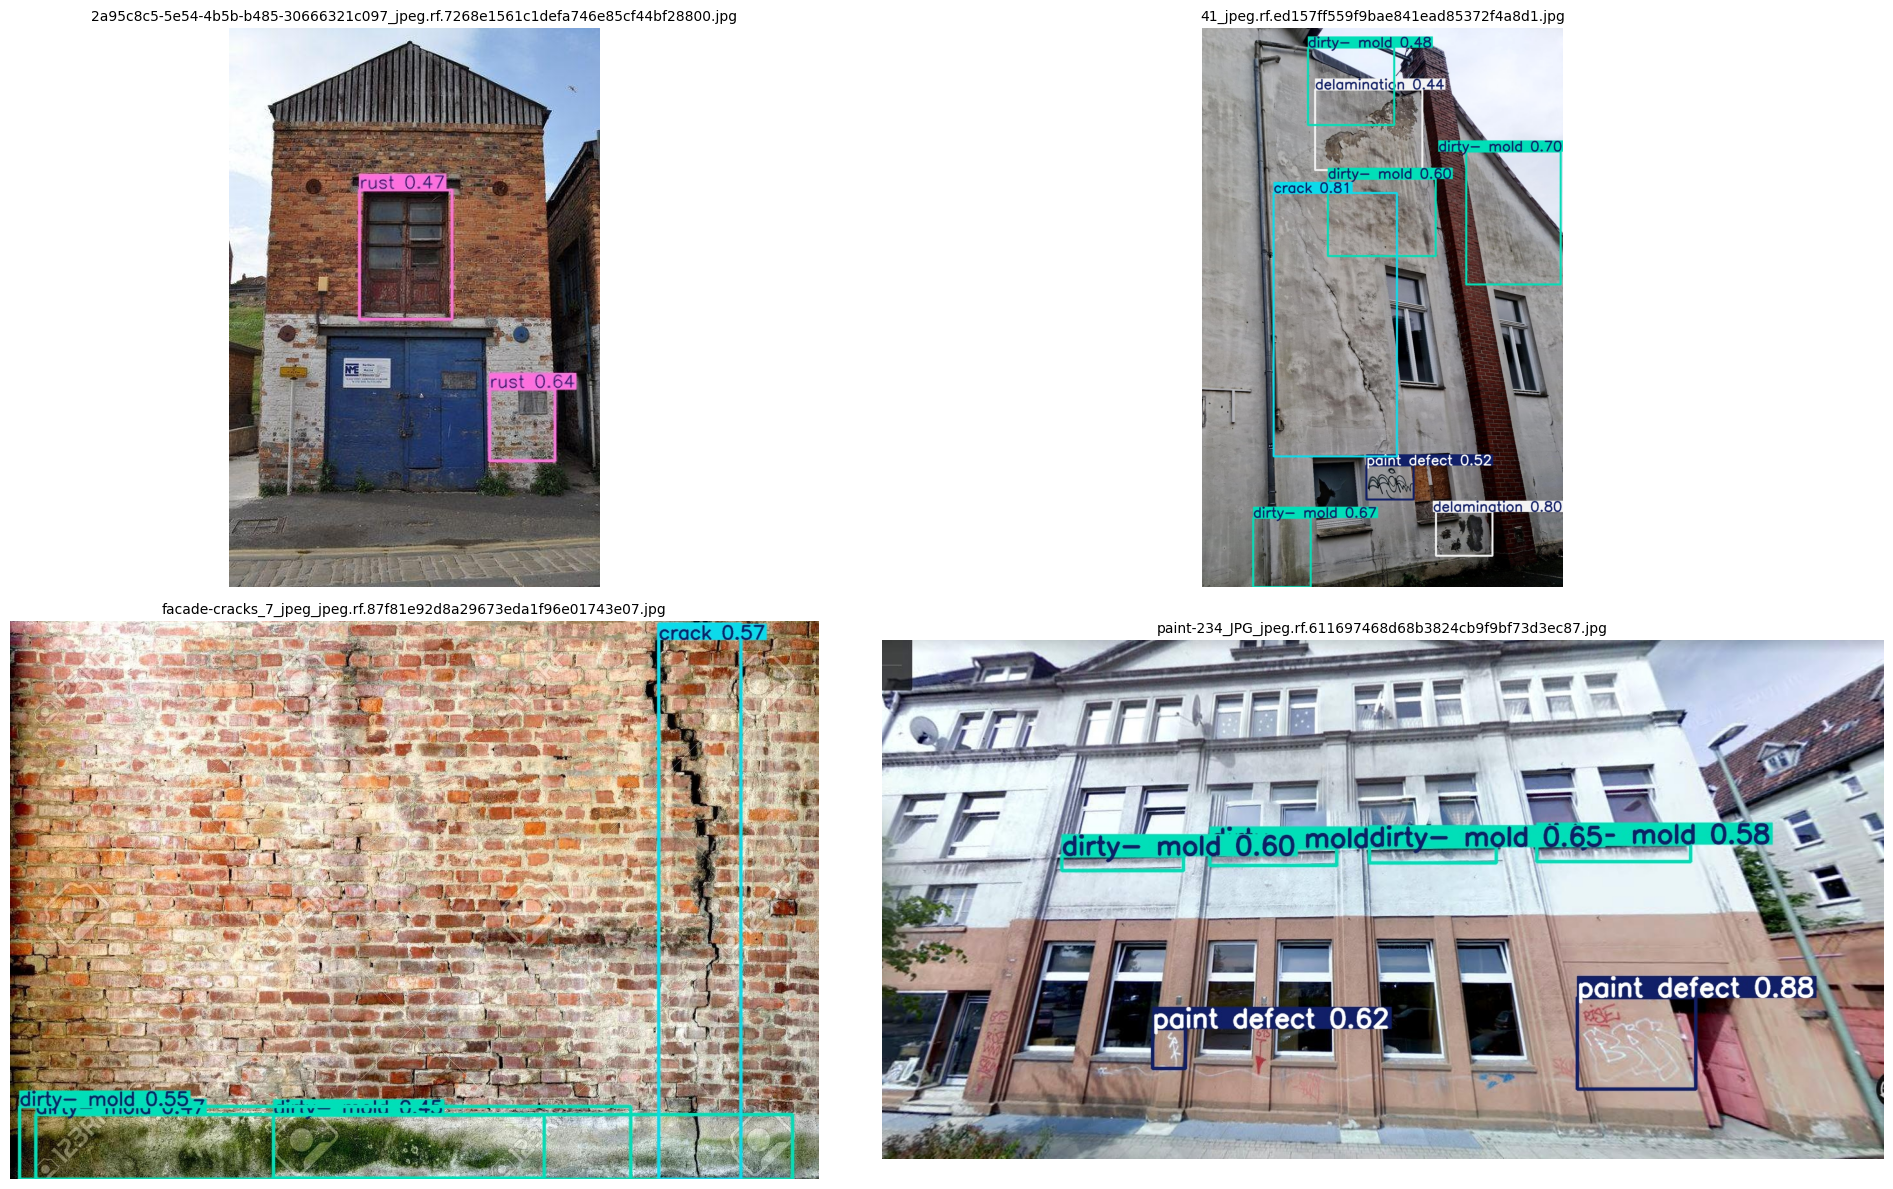

In [40]:
import matplotlib.pyplot as plt
import glob
import os
import random

def visualize_results(result_dir='runs/detect/predict', num_samples=4):
    """
    Визуализирует результаты детекции с аннотациями
    """
    # Получаем список изображений с предсказаниями
    image_paths = glob.glob(os.path.join(result_dir, '*.jpg'))
    
    if not image_paths:
        raise FileNotFoundError(f"No images found in {result_dir}")

    plt.figure(figsize=(20, 12))
    random.shuffle(image_paths)
    
    for i, img_path in enumerate(image_paths[:num_samples]):
        # Загружаем изображение с аннотациями
        image = plt.imread(img_path)
        
        # Создаем subplot
        plt.subplot(2, 2, i+1)
        plt.imshow(image)
        plt.title(os.path.basename(img_path), fontsize=10)
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# Используйте актуальный путь из вашего лога
visualize_results('/home/alex/Документы/vs_code/AI/python/my_project/runs/detect/predict')